In [2]:
# https://habr.com/ru/company/ods/blog/323210/
import warnings
warnings.simplefilter('ignore')

# draw graphics in jupyter
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

#svg graphics
%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 8,5

import pandas as pandas



In [3]:
df = pandas.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
# convert user score from object to float, drop NaN
df['User_Score_f'] = pandas.to_numeric(df['User_Score'],errors='coerce')
df.dropna()
df.drop('User_Score',axis = 1)
print(df.shape)



(16719, 17)


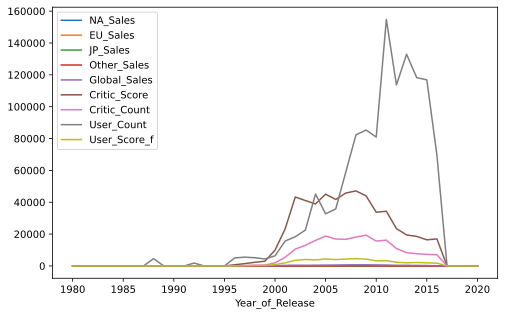

In [6]:
sales_by_year = df.groupby('Year_of_Release').sum().plot()

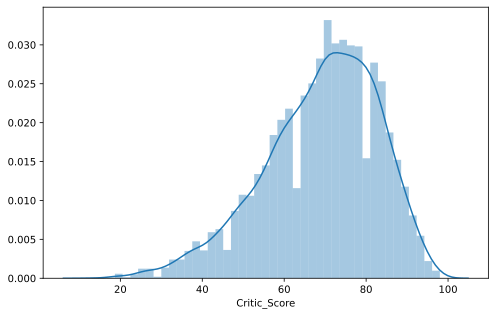

In [7]:
columns = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
#sns_plot = sns.pairplot(df[columns])
# sns_plot.savefig('pairplot.png')

sns.distplot(df['Critic_Score'])

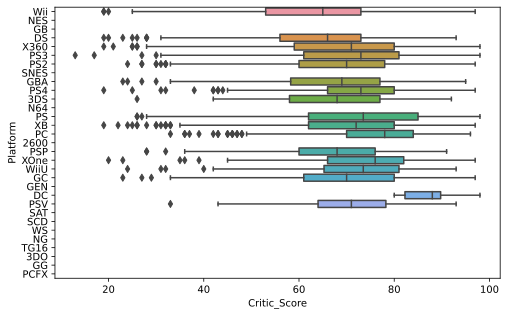

In [8]:
top_platforms = df['Platform'].value_counts().sort_values(ascending = False).index.values
sns.boxplot(y='Platform',x='Critic_Score',data=df)

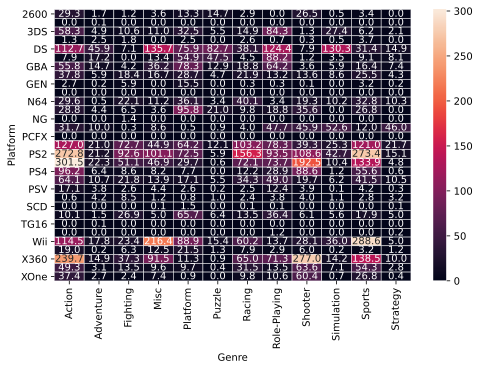

In [9]:
platform_genre_sales = df.pivot_table(
    index='Platform', 
    columns='Genre', 
    values='Global_Sales', 
    aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot = True, fmt='.1f', linewidth = .5)

In [15]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected = True)

years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')['Name'].count()
)

years_df.columns = ['Global_Sales', 'Number_of_Games']

trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name = 'Number of games released'
)

data=[trace0,trace1]
layout= {'title': 'Statistics of videogames'}

fig = go.Figure(data = data, layout = layout)
iplot(fig, show_link = False)

#plotly.offline.plot(fig, filename='years_stats.html', show_link = False)

In [29]:
data = []
for genre in df['Genre'].unique():
    data.append(
        go.Box(
            y=df[df['Genre']==genre]['Critic_Score'], 
            #orientation='h',
            name=genre)
    )
    
    
layout = go.Layout(
    width =600,
    height = 700
)

fig = go.Figure(data = data, layout = layout)

iplot(fig, show_link = False)

ValueError: 
    Invalid value of type 'builtins.bool' received for the 'legend' property of layout
        Received value: False

    The 'legend' property is an instance of Legend
    that may be specified as:
      - An instance of :class:`plotly.graph_objs.layout.Legend`
      - A dict of string/value properties that will be passed
        to the Legend constructor

        Supported dict properties:
            
            bgcolor
                Sets the legend background color. Defaults to
                `layout.paper_bgcolor`.
            bordercolor
                Sets the color of the border enclosing the
                legend.
            borderwidth
                Sets the width (in px) of the border enclosing
                the legend.
            font
                Sets the font used to text the legend items.
            itemclick
                Determines the behavior on legend item click.
                "toggle" toggles the visibility of the item
                clicked on the graph. "toggleothers" makes the
                clicked item the sole visible item on the
                graph. False disable legend item click
                interactions.
            itemdoubleclick
                Determines the behavior on legend item double-
                click. "toggle" toggles the visibility of the
                item clicked on the graph. "toggleothers" makes
                the clicked item the sole visible item on the
                graph. False disable legend item double-click
                interactions.
            itemsizing
                Determines if the legend items symbols scale
                with their corresponding "trace" attributes or
                remain "constant" independent of the symbol
                size on the graph.
            orientation
                Sets the orientation of the legend.
            title
                :class:`plotly.graph_objects.layout.legend.Titl
                e` instance or dict with compatible properties
            tracegroupgap
                Sets the amount of vertical space (in px)
                between legend groups.
            traceorder
                Determines the order at which the legend items
                are displayed. If "normal", the items are
                displayed top-to-bottom in the same order as
                the input data. If "reversed", the items are
                displayed in the opposite order as "normal". If
                "grouped", the items are displayed in groups
                (when a trace `legendgroup` is provided). if
                "grouped+reversed", the items are displayed in
                the opposite order as "grouped".
            uirevision
                Controls persistence of legend-driven changes
                in trace and pie label visibility. Defaults to
                `layout.uirevision`.
            valign
                Sets the vertical alignment of the symbols with
                respect to their associated text.
            x
                Sets the x position (in normalized coordinates)
                of the legend. Defaults to 1.02 for vertical
                legends and defaults to 0 for horizontal
                legends.
            xanchor
                Sets the legend's horizontal position anchor.
                This anchor binds the `x` position to the
                "left", "center" or "right" of the legend.
                Value "auto" anchors legends to the right for
                `x` values greater than or equal to 2/3,
                anchors legends to the left for `x` values less
                than or equal to 1/3 and anchors legends with
                respect to their center otherwise.
            y
                Sets the y position (in normalized coordinates)
                of the legend. Defaults to 1 for vertical
                legends, defaults to "-0.1" for horizontal
                legends on graphs w/o range sliders and
                defaults to 1.1 for horizontal legends on graph
                with one or multiple range sliders.
            yanchor
                Sets the legend's vertical position anchor This
                anchor binds the `y` position to the "top",
                "middle" or "bottom" of the legend. Value
                "auto" anchors legends at their bottom for `y`
                values less than or equal to 1/3, anchors
                legends to at their top for `y` values greater
                than or equal to 2/3 and anchors legends with
                respect to their middle otherwise.


In [51]:
columns = ['User_Count', 'Global_Sales', 'Critic_Score']

X = df[columns]
X.dropna()

,User_Count,Global_Sales,Critic_Score
0,322.0,82.53,76.0
2,709.0,35.52,82.0
3,192.0,32.77,80.0
6,431.0,29.80,89.0
7,129.0,28.92,58.0
...,...,...,...
16677,9.0,0.01,81.0
16696,412.0,0.01,80.0
16700,43.0,0.01,61.0
16706,13.0,0.01,60.0


In [57]:

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


array([[ 0.28467067, 52.97309191,  0.50456813],
       [        nan, 25.65200841,         nan],
       [ 0.97420868, 22.60269382,  0.93506733],
       ...,
       [        nan, -0.33823015,         nan],
       [        nan, -0.33823015,         nan],
       [        nan, -0.33823015,         nan]])

In [56]:


tsne = TSNE(random_state = 17)
tsn_representation = tsne.fit_transform(X_scaled)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').